In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
digits = pd.read_csv("digits.csv", header=None)

In [3]:
digits.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


# Section I: Feature explorations

In [4]:
# dimensions of dataset
digits.shape

(1797, 65)

In [5]:
print("Sample size:", digits.shape[0])
print("Number of features in dataset:", digits.shape[1])

Sample size: 1797
Number of features in dataset: 65


In [6]:
# general statistical distribution of each feature
digits.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
# general distribution of classes
classes = digits.iloc[:,-1].value_counts().sort_index(ascending=True)
classes

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: 64, dtype: int64

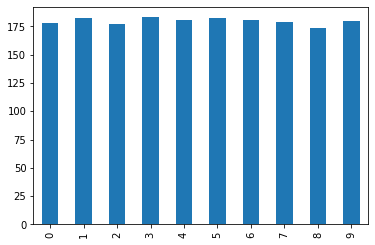

In [8]:
classes.plot(kind='bar', stacked=True, colormap="tab10")

# Section 2: Image Visualization

In [9]:
def _show_image(index):
    image = digits.iloc[index,:-1]
    label = digits.iloc[index,-1]

    plottable_image = np.reshape(image.values, (8, 8))

    plt.figure(figsize=(2,2))
    plt.imshow(plottable_image, cmap='gray_r')
    plt.title('Digit Label: {}'.format(label))
    plt.show()

# shows the image marked by index    
def show_image_by_index(index):
    _show_image(index)
    
# shows any random image using any row of data
def show_random_image():
    index = random.randint(0, digits.shape[0])
    _show_image(index)

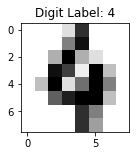

In [10]:
# showing 100-th image
show_image_by_index(100)

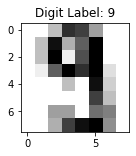

In [11]:
# just a random image
show_random_image()

# Section 3: Fisher's Linear Discriminant Ananlysis

In [12]:
# global variables
dimension = 2
sample_size = digits.shape[0]
num_of_features = digits.shape[1] - 1

#### we start with whole dataset and find the total error rate; in later part, we will use the defined functions to do cross validation

In [13]:
X = digits.iloc[:,:-1] # features
y = digits.iloc[:,-1]  # labels

In [14]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [15]:
# mean of all 64 features
mean = np.mean(X,axis=0).values.reshape(num_of_features, 1)
mean.shape

(64, 1)

In [16]:
# view first 10 rows of mean
mean[0:10,:]

array([[0.00000000e+00],
       [3.03839733e-01],
       [5.20478575e+00],
       [1.18358375e+01],
       [1.18480801e+01],
       [5.78185865e+00],
       [1.36227045e+00],
       [1.29660545e-01],
       [5.56483027e-03],
       [1.99387869e+00]])

In [17]:
# class specific means
mean_k = []
for i,label in enumerate(np.unique(y)):
    mean_k.append(np.mean(X.where(y==label),axis=0))
mean_k = np.array(mean_k).T
mean_k.shape

(64, 10)

In [18]:
# view first 5 rows and 4 columns of mean_k
mean_k[0:5,0:4]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.24719101e-02, 1.09890110e-02, 9.32203390e-01, 6.44808743e-01],
       [4.18539326e+00, 2.45604396e+00, 9.66666667e+00, 8.38797814e+00],
       [1.30955056e+01, 9.20879121e+00, 1.41864407e+01, 1.41693989e+01],
       [1.12977528e+01, 1.04065934e+01, 9.62711864e+00, 1.42240437e+01]])

In [19]:
values_for_Sw = []
count_per_class = []
for i,label in enumerate(np.unique(y)):
    features_specific_class = X.where(y==label).dropna().values
    means_specific_class = mean_k[:,i].reshape(1, num_of_features)
    
    difference = np.array(features_specific_class - means_specific_class)
    prod = np.dot(difference.T, difference)
    
    values_for_Sw.append(prod)
    count_per_class.append(np.sum(y==label))

In [20]:
Sw = np.sum(values_for_Sw, axis=0)
Sw.shape

(64, 64)

In [21]:
Sw

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,  1231.41389858,  2364.1078781 , ...,
         -448.442562  ,  -310.73065015,  -265.272076  ],
       [    0.        ,  2364.1078781 , 22381.21358898, ...,
        -2638.10867562,   -61.82111346,   559.07292961],
       ...,
       [    0.        ,  -448.442562  , -2638.10867562, ...,
        32910.65533061, 13787.01907422,  2799.40358131],
       [    0.        ,  -310.73065015,   -61.82111346, ...,
        13787.01907422, 19590.24569052,  6143.37309594],
       [    0.        ,  -265.272076  ,   559.07292961, ...,
         2799.40358131,  6143.37309594,  5382.71883178]])

In [22]:
Sb = np.dot(count_per_class * np.array(mean_k-mean), np.array(mean_k-mean).T)
Sb.shape

(64, 64)

In [23]:
Sb

array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,   246.68960726,  1948.07910019, ...,
          161.27060875,   487.66220274,   132.25705095],
       [    0.        ,  1948.07910019, 18223.42525353, ...,
          562.93783533,  2597.83725146,   751.7924015 ],
       ...,
       [    0.        ,   161.27060875,   562.93783533, ...,
        29621.30237668, 14317.76667981,  2365.14288502],
       [    0.        ,   487.66220274,  2597.83725146, ...,
        14317.76667981, 10461.47161611,  2335.15834535],
       [    0.        ,   132.25705095,   751.7924015 , ...,
         2365.14288502,  2335.15834535,   831.53603744]])

In [24]:
inverse_Sw = np.linalg.pinv(Sw)
multiplied = np.dot(inverse_Sw, Sb)
eigen_value, eigen_vector = np.linalg.eig(multiplied)

In [25]:
# build pairs of eigen value and eigen vectors
eigen_pairs = []
for i in range(len(eigen_value)):
    eigen_pairs.append([np.abs(eigen_value[i]), eigen_vector[:,i]])

# sort based on highest eigen value
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# store the largest two eigen values and corresponding eigen vectors
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, eigen_pairs[1][1][:,np.newaxis].real))
w.shape

(64, 2)

In [26]:
# view top five rows of w
w[0:5,:]

array([[ 0.        ,  0.        ],
       [ 0.0164056 ,  0.00377548],
       [-0.00578923, -0.00901302],
       [-0.01595986, -0.01885719],
       [-0.00237036, -0.00628214]])

In [27]:
# reduced_X is teh reduced dimension values of X
reduced_X = X.dot(w)

In [28]:
reduced_X.shape

(1797, 2)

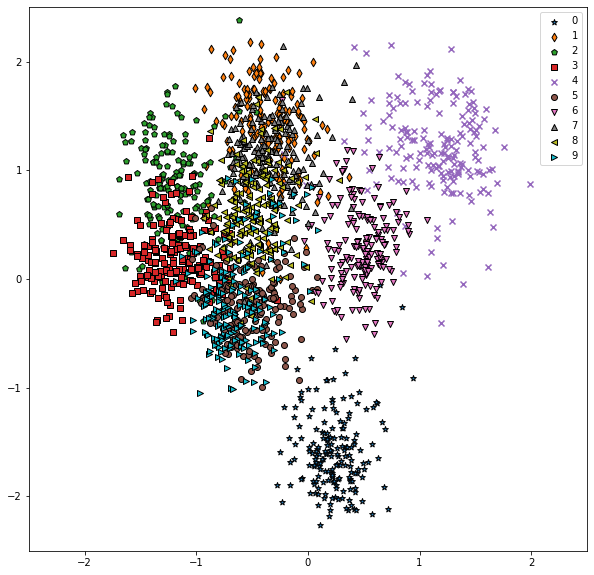

In [29]:
# plotting the 2D points based on class labels
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-2.5,2.5)
ax0.set_ylim(-2.5,2.5)

markers = ['*','d','p','s','x','o','v','^','<','>']

for l,m in zip(np.unique(y), markers):
    ax0.scatter(reduced_X[0][y==l], reduced_X[1][y==l], marker=m, label=l, edgecolors='black')
ax0.legend(loc='upper right')

plt.show()

# Section 4: Gaussian Generative Modeling

In [30]:
# returns probability density function based on mean and covariance
def prob_density_func(point, mean, cov):
    cons = 1./((2*np.pi)**(len(point)/2.) * np.linalg.det(cov)**(-0.5))
    return cons * np.exp(-np.dot(np.dot((point-mean), np.linalg.pinv(cov)),(point-mean).T)/2.)

In [31]:
def get_error_rate(w, X, y):
    priors = {}
    gaussian_means = {}
    gaussian_cov = {}
    classes = []

    for i, label in enumerate(np.unique(y)):
        classes.append(label)
        X_specific_class = X.where(y==label).dropna().values
        
        projected_values = np.dot(w.T, X_specific_class.T).T
        priors[label] = X_specific_class.shape[0] / float(digits.shape[0])
        gaussian_means[label] = np.mean(projected_values, axis = 0)
        gaussian_cov[label] = np.cov(projected_values, rowvar=False)

    projected_values = np.dot(w.T, X.T).T
    likelihoods = np.array([[priors[c] * prob_density_func([x[ind] for ind in range(len(x))], gaussian_means[c], gaussian_cov[c]) for c in classes] for x in projected_values])
    
    output_labels = np.argmax(likelihoods, axis = 1)
    
    errors = np.sum(output_labels != y)
    error_rate = errors/float(X.shape[0])
    
    inverse_Sw = np.linalg.pinv(Sw)
    multiplied = np.dot(inverse_Sw, Sb)
    eigen_value, eigen_vector = np.linalg.eig(multiplied)
    
    return error_rate

In [32]:
# if we use the whole dataset, the error rate is:
get_error_rate(w, X, y)

0.32276015581524764

# Section 5: Now we apply same steps for 10-fold cross validation

In [33]:
# global variables
k_fold = 10
seed = 200

In [34]:
# randomise the dataset (with seed for reproducing)
digits = digits.sample(frac=1, random_state=seed).reset_index(drop=True)

# break down indices in 10 folds and save it
folds_indices = []
start_index = 0
steps = sample_size / k_fold
for i in range(k_fold):
    end_index = start_index + steps
    folds_indices.append([round(start_index), round(end_index)])
    start_index = end_index

folds_indices

[[0, 180],
 [180, 359],
 [359, 539],
 [539, 719],
 [719, 898],
 [898, 1078],
 [1078, 1258],
 [1258, 1438],
 [1438, 1617],
 [1617, 1797]]

In [35]:
kfold_train_errors = []
kfold_test_errors = []

for i in range(len(folds_indices)):    
    test = digits.iloc[folds_indices[i][0]:folds_indices[i][1],:]
    train = digits.drop(test.index)
    
    train_x = train.iloc[:,:-1]
    train_y = train.iloc[:,-1]
    test_x = test.iloc[:,:-1]
    test_y = test.iloc[:,-1]
    
    train_error = get_error_rate(w, train_x, train_y)
    kfold_train_errors.append(train_error)
    
    test_error = get_error_rate(w, test_x, test_y)
    kfold_test_errors.append(test_error)

In [36]:
kfold_train_errors

[0.31849103277674706,
 0.30284301606922126,
 0.3302411873840445,
 0.3197278911564626,
 0.31087762669962915,
 0.33147804576376005,
 0.33766233766233766,
 0.3197278911564626,
 0.3300370828182942,
 0.32838589981447125]

In [37]:
kfold_test_errors

[0.35555555555555557,
 0.4134078212290503,
 0.28888888888888886,
 0.2611111111111111,
 0.4134078212290503,
 0.3111111111111111,
 0.25555555555555554,
 0.34444444444444444,
 0.27932960893854747,
 0.37777777777777777]

In [38]:
np.mean(kfold_train_errors)

0.3229472011301431

In [39]:
np.mean(kfold_test_errors)

0.33005896958410924